# **1000-719bMSB Modeling of Complex Biological Systems**
# **Deep Neural Network: Supervised Learning**

### Basic python and pandas
https://www.kaggle.com/lavanyashukla01/pandas-numpy-python-cheatsheet

https://www.utc.fr/~jlaforet/Suppl/python-cheatsheets.pdf

List comprehensions are a concise way to create new lists from existing ones.

In [1]:
list1 = list(range(0,10))
print(list1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [2]:
list1[0] # A vector in R starts with an index of 1. In Python, 0.

0

In [3]:
list1[2:5]

[2, 3, 4]

In [4]:
list2 = []
for i in list1:
    list2.append(i+1)
    
print(list2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [5]:
list3 = [i+1 for i in list1]

print(list3)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Classification of MNIST using densely connected layers

We are going to use the Keras library to implement a neural network that can classify handwritten digits - in just a few lines of code.

First we load and inspect the data. The dataset is split into training and test data.

In [6]:
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [7]:
import tensorflow as tf
print(tf.__version__)
tf.compat.v1.disable_eager_execution()

2.7.0


In [8]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_labels.shape

(60000,)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
test_labels.shape

(10000,)

Let's plot one of the digits and the corresponding label.

Label of element 0: 0


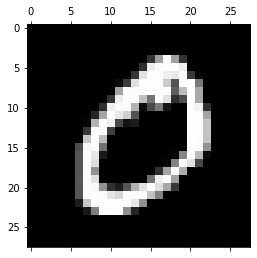

In [13]:
print('Label of element 0:',train_labels[1])
plt.matshow(train_images[1], cmap='gray')
plt.show()

In this step we define the neural network. ReLu is an activation function defined as f(x) = max(0,x).

Softmax activation function is normalized such that the sum of all outputs is equal 1.

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

With compile we tell the network which optimizer and loss function to use. Optimizer specifies the particular implementation of the gradient-descent, e.g. how it adapts the learning rate. 'Metrics' specifies the output during the training.

In [15]:
model.compile(optimizer='rmsprop',
loss='mean_squared_error',
metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


We are using a densely connected network, so we have to flatten the images.  
Input values should be in the range (0,1) for fast convergence.  

In [17]:
train_images_flat = train_images.reshape((60000, 28 * 28))
train_images_flat = train_images_flat.astype('float32') / 255
test_images_flat = test_images.reshape((10000, 28 * 28))
test_images_flat = test_images_flat.astype('float32') / 255

Convert the labels to a 'one-hot' coding.

In [18]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
train_images.reshape((60000,28*28)).shape

(60000, 784)

In [20]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

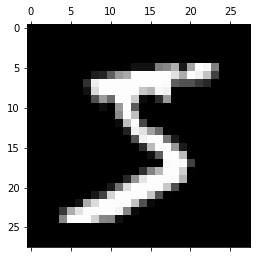

In [21]:
plt.matshow(train_images[0], cmap='gray')
plt.show()

In [22]:
model.fit(train_images_flat, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0122 - accuracy: 0.9213
Epoch 2/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0053 - accuracy: 0.9667
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0037 - accuracy: 0.9773
Epoch 4/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0028 - accuracy: 0.9826
Epoch 5/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0023 - accuracy: 0.9862


Let's check the performance on the test set. If the accuracy is less than the training accuracy, then we might be overfitting!

In [23]:
test_loss, test_acc = model.evaluate(test_images_flat, test_labels)
print('test_acc:', test_acc)

C:\Users\zosia\anaconda3\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


test_acc: 0.9768


We can also find the predictions for a selection of input images.

In [24]:
predictions = model.predict(train_images_flat[:10])

C:\Users\zosia\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[6.02734431e-08 9.99658704e-01 4.88651604e-05 3.12580300e-06
 1.44826945e-05 6.93007749e-08 2.81787493e-06 1.16178169e-04
 1.55522735e-04 9.67063727e-08]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


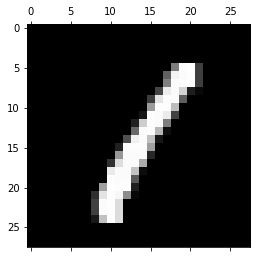

In [25]:
img_num = 3
print(predictions[img_num])
print(train_labels[img_num])
plt.matshow(train_images[img_num], cmap='gray')
plt.show()

In [26]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# Classification of MNIST using convolutional layers

We have build a classifier for handwritten images only using densely connected layers. Let's see if we can do better using convolutional layers!

First define the convolutional layers.

In [27]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

Now add a classifier on top of the convnet.

In [29]:
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [30]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [31]:
train_images_conv = train_images.reshape((60000, 28, 28, 1))
train_images_conv = train_images_conv.astype('float32') / 255
test_images_conv = test_images.reshape((10000, 28, 28, 1))
test_images_conv = test_images_conv.astype('float32') / 255

In [32]:
model2.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [33]:
model2.fit(train_images_conv, train_labels, epochs=15, batch_size=64)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 25s 423us/sample - loss: 0.1764 - accuracy: 0.9452- l - ETA: 0s - loss: 0.1773 - accuracy
Epoch 2/15
60000/60000 [==============================] - 24s 405us/sample - loss: 0.0490 - accuracy: 0.9843
Epoch 3/15
60000/60000 [==============================] - 24s 406us/sample - loss: 0.0334 - accuracy: 0.9895
Epoch 4/15
60000/60000 [==============================] - 24s 406us/sample - loss: 0.0257 - accuracy: 0.9919
Epoch 5/15
60000/60000 [==============================] - 24s 407us/sample - loss: 0.0194 - accuracy: 0.9941
Epoch 6/15
60000/60000 [==============================] - 24s 404us/sample - loss: 0.0162 - accuracy: 0.9949
Epoch 7/15
60000/60000 [==============================] - 24s 403us/sample - loss: 0.0130 - accuracy: 0.9961
Epoch 8/15
60000/60000 [==============================] - 27s 446us/sample - loss: 0.0108 - accuracy: 0.9966
Epoch 9/15
60000/60000 [==============================] - 25s 415u

In [34]:
test_loss, test_acc = model2.evaluate(test_images_conv, test_labels)
print(test_acc)

0.9918


## Introducing Fashion MNIST (Homework dataset)

---



The MNIST dataset is not too demanding, let's try something a little more difficult - Fashion MNIST.

[LINK TO IMAGE](https://s3-eu-central-1.amazonaws.com/zalando-wp-zalando-research-production/2017/08/fashion-mnist-sprite.png)

Check out labels on [GitHub](https://github.com/zalandoresearch/fashion-mnist)

In [35]:
(train_imgs_fash, train_labels_fash), (test_imgs_fash, test_labels_fash) = keras.datasets.fashion_mnist.load_data()

In [36]:
train_imgs_fash.shape

(60000, 28, 28)

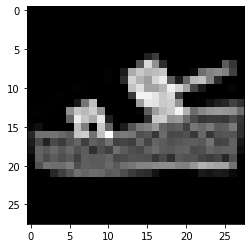

In [37]:
plt.imshow(train_imgs_fash[12],  cmap=plt.get_cmap('gray'))

# **HOMEWORK 1**
Build a classifier for fashion MNIST.

**1. Use exactly the same architectures (both densely connected layers and from convolutional layers) as the above MNIST** e.g., replace the dataset. Save the Jupyter Notebook in its original format and output a PDF file after training, testing, and validation. Make sure to write down how do they perform (training accuracny, testing accuracy).  
**2. Improve the architecture**. Experiment with different numbers of layers, size of layers, number of filters, size of filters. You are required to make those adjustment to get the highest accuracy. Watch out for overfitting -- we want the highest testing accuracy!
Please provide a PDF file of the result, the best test accuracy and the architecture (different numbers of layers, size of layers, number of filters, size of filters)

### HOMEWORK 1.1

In [38]:
# Changing the hw dataset
# Densely connected
train_img_hw = train_imgs_fash.reshape((60000, 28 * 28))
train_img_hw = train_img_hw.astype('float32') / 255
test_img_hw = test_imgs_fash.reshape((10000, 28 * 28))
test_img_hw = test_img_hw.astype('float32') / 255

# Convolutional
train_img_conv_hw = train_imgs_fash.reshape((60000, 28, 28, 1))
train_img_conv_hw = train_img_conv_hw.astype('float32') / 255
test_img_conv_hw = test_imgs_fash.reshape((10000, 28, 28, 1))
test_img_conv_hw = test_img_conv_hw.astype('float32') / 255

# Labels
train_labels_hw = to_categorical(train_labels_fash)
test_labels_hw = to_categorical(test_labels_fash)

#### Densely connected model

In [39]:
# Densely connected model
model_hw1 = models.Sequential()
model_hw1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_hw1.add(layers.Dense(10, activation='softmax'))
model_hw1.compile(optimizer='rmsprop',
loss='mean_squared_error',
metrics=['accuracy'])
model_hw1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Fitting first model (densely connected)
model_hw1.fit(train_img_hw, train_labels_hw, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0318 - accuracy: 0.7767
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0209 - accuracy: 0.8563
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0185 - accuracy: 0.8731
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0172 - accuracy: 0.8822
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0162 - accuracy: 0.8910


In [41]:
print("Densely connected model")
test_loss, test_acc = model_hw1.evaluate(test_img_hw, test_labels_hw)
print('test_acc:', test_acc)
train_loss, train_acc = model_hw1.evaluate(train_img_hw, train_labels_hw)
print('train_acc:', train_acc)

Densely connected model
test_acc: 0.8667
train_acc: 0.8894333


#### Convolutional model

In [42]:
model_hw2 = models.Sequential()
model_hw2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_hw2.add(layers.MaxPooling2D((2, 2)))
model_hw2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_hw2.add(layers.MaxPooling2D((2, 2)))
model_hw2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_hw2.add(layers.Flatten())
model_hw2.add(layers.Dense(64, activation='relu'))
model_hw2.add(layers.Dense(10, activation='softmax'))
model_hw2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model_hw2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [43]:
model_hw2.fit(train_img_conv_hw, train_labels_hw, epochs=15, batch_size=64)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 25s 415us/sample - loss: 0.5348 - accuracy: 0.8030
Epoch 2/15
60000/60000 [==============================] - 26s 429us/sample - loss: 0.3324 - accuracy: 0.8782
Epoch 3/15
60000/60000 [==============================] - 24s 403us/sample - loss: 0.2804 - accuracy: 0.8973
Epoch 4/15
60000/60000 [==============================] - 24s 407us/sample - loss: 0.2475 - accuracy: 0.9094
Epoch 5/15
60000/60000 [==============================] - 24s 406us/sample - loss: 0.2245 - accuracy: 0.9181
Epoch 6/15
60000/60000 [==============================] - 24s 403us/sample - loss: 0.2055 - accuracy: 0.9247
Epoch 7/15
60000/60000 [==============================] - 24s 404us/sample - loss: 0.1884 - accuracy: 0.9313- loss: 0.1885 - accuracy: 
Epoch 8/15
60000/60000 [==============================] - 24s 407us/sample - loss: 0.1727 - accuracy: 0.9360
Epoch 9/15
60000/60000 [==============================] - 24s 408us/sample - l

In [44]:
print("Convolutional model")
test_loss_model_hw2, test_acc_model_hw2 = model_hw2.evaluate(test_img_conv_hw, test_labels_hw)
print("test acc: ", test_acc_model_hw2)
train_loss_model_hw2, train_acc_model_hw2 = model_hw2.evaluate(train_img_conv_hw, train_labels_hw)
print("train_acc: ", train_acc_model_hw2)

Convolutional model
test acc:  0.9059
train_acc:  0.9673


### HOMEWORK 1.2

In [45]:
model_hw_improved = tf.keras.Sequential()    
model_hw_improved.add(tf.keras.layers.InputLayer(input_shape=(28,28,1)))
model_hw_improved.add(tf.keras.layers.BatchNormalization())
model_hw_improved.add(tf.keras.layers.Convolution2D(64, (4, 4), padding='same', activation='relu'))
model_hw_improved.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_hw_improved.add(tf.keras.layers.Dropout(0.2))
model_hw_improved.add(tf.keras.layers.Convolution2D(64, (4, 4), activation='relu'))
model_hw_improved.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_hw_improved.add(tf.keras.layers.Dropout(0.2))
model_hw_improved.add(tf.keras.layers.Flatten())
model_hw_improved.add(tf.keras.layers.Dense(256, activation='relu'))
model_hw_improved.add(tf.keras.layers.Dropout(0.4))
model_hw_improved.add(tf.keras.layers.Dense(64, activation='relu'))
model_hw_improved.add(tf.keras.layers.BatchNormalization())
model_hw_improved.add(tf.keras.layers.Dense(10, activation='softmax'))
model_hw_improved.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_hw_improved.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        1088      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        65600     
                                                

In [46]:
model_hw_improved.fit(train_img_conv_hw, train_labels_hw, epochs=15, batch_size=64)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.5337 - accuracy: 0.8067
Epoch 2/15
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.3453 - accuracy: 0.8745
Epoch 3/15
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.3019 - accuracy: 0.8883
Epoch 4/15
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.2792 - accuracy: 0.8980
Epoch 5/15
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.2608 - accuracy: 0.9045
Epoch 6/15
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.2438 - accuracy: 0.9096
Epoch 7/15
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.2318 - accuracy: 0.9140
Epoch 8/15
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.2229 - accuracy: 0.9180
Epoch 9/15
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.2114 - accuracy: 0.9214
Epoch 10/15
60

In [47]:
# Test accuracy needs to be higher than 0.9059
print("Improved model")
test_loss_model_hw_improved, test_acc_model_hw_improved = model_hw_improved.evaluate(test_img_conv_hw, test_labels_hw)
print("test acc: ", test_acc_model_hw_improved)
train_loss_model_hw_improved, train_acc_model_hw_improved = model_hw_improved.evaluate(train_img_conv_hw, train_labels_hw)
print("train_acc: ", train_acc_model_hw_improved)

Improved model
test acc:  0.9208
train_acc:  0.96066666


# Visualizing Filter Response

We use gradient descent in input space to display the visual pattern each filter is maximally responsive to.  
To this end we take a VGG19 convnet pretrained on the ImageNet dataset.

[Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)
Karen Simonyan, Andrew Zisserman

[DL Architecture](https://neurohive.io/wp-content/uploads/2018/11/vgg16-neural-network.jpg)

In [48]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import backend as K
import numpy as np

import matplotlib.pyplot as plt

#Load pretrained model
#we omit the densely connected layers of the network
model = VGG19(weights='imagenet', include_top=False)

In [49]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [50]:
#Specify filter you want to visualize and get its output
layer_name = 'block5_conv3'
filter_index = 3
layer_output = model.get_layer(layer_name).output

#Loss is the averaged activation of the chosen filter
loss = K.mean(layer_output[:, :, :, filter_index])

In [51]:
#Gradients of loss with respect to the input
#upgrading to 2.x: tf.gradients is no longer supported
#requiring tf.compat.v1.disable_eager_execution()
grads = K.gradients(loss, model.input)[0]

#A trick is to normalize the gradients by their L2 norm
#This ensures that the magnitude of the gradients is always in the same range
#and leads to a smooth descent process
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [52]:
#The tensors defined so far (loss, grads) were symbolic
#To obtain values we need to feed an input via K.function

iterate = K.function([model.input], [loss, grads])
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [53]:
print(grads)
print(grads_value)

Tensor("truediv:0", shape=(None, None, None, 3), dtype=float32)
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [54]:
#Implement the actual gradient descent
#Initial input is a grey image with some noise

input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

In [55]:
print(grads_value)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [56]:
#Postprocess to turn into displayable image

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

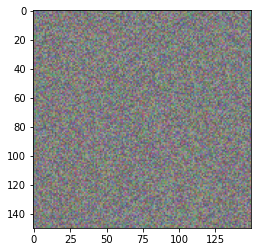

In [57]:
plt.imshow(deprocess_image(input_img_data[0]))

**HOMEWORK 2**:

Write a function that takes as arguments the name of the layer and filter index and outputs the displayable filter response.  
Then you can choose different filters and visualize which patterns they are responsive too! Submit the code (as Notebook) and at least 3 filter responses (a PDF file).

In [58]:
def filter_response(layer_name, filter_index, model):
    layer_output = model.get_layer(layer_name).output

    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

    input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
    step = 1
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    return input_img_data



In [59]:
hw2_1 = deprocess_image(filter_response("block5_conv2", 3, model)[0])
hw2_2 = deprocess_image(filter_response("block3_conv3", 3, model)[0])
hw2_3 = deprocess_image(filter_response("block4_conv4", 3, model)[0])

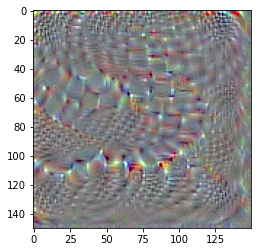

In [60]:
plt.imshow(hw2_1)

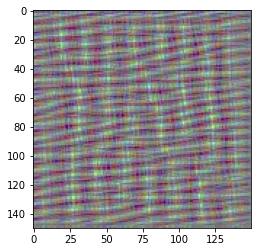

In [61]:
plt.imshow(hw2_2)

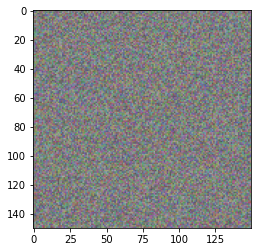

In [62]:
plt.imshow(hw2_3)